<a href="https://colab.research.google.com/github/VadushaLyapushin/rzhavchina/blob/main/model60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/VadushaLyapushin/rzhavchina.git

Cloning into 'rzhavchina'...
remote: Enumerating objects: 939, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 939 (delta 5), reused 8 (delta 1), pack-reused 918
Receiving objects: 100% (939/939), 131.95 MiB | 33.33 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (1086/1086), done.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint

from skimage import exposure
from skimage import transform
from skimage import io

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import paths
import os
import matplotlib.pyplot as plt
import csv
import cv2
import numpy as np
import pickle
import random
import tensorflow as tf


In [ ]:
ImagePathsWithoot = list(paths.list_images("/content/rzhavchina/Add images/without"))
print(len(ImagePathsWithoot))
ImagePathsSurface = list(paths.list_images("/content/rzhavchina/Add images/surface"))
print(len(ImagePathsSurface))
ImagePathsDeep = list(paths.list_images("/content/rzhavchina/Add images/deep"))
print(len(ImagePathsDeep))

227
178
243


In [ ]:
ImagePaths = ImagePathsWithoot + ImagePathsSurface + ImagePathsDeep
random.shuffle(ImagePaths)
print(len(ImagePaths))

648


In [ ]:
data = []
labels = []

i=0
for imagepath in ImagePaths:
  image = cv2.imread(imagepath)
  image = cv2.resize(image, (256, 256))
  data.append(image)
  label = imagepath.split('/')[-2]
  if label == "without":
    label = [1, 0, 0]
  elif label == "surface":
    label = [0, 1, 0]
  elif label == "deep":
    label = [0, 0, 1]
  labels.append(label)
print(labels)

data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

with open("/content/drive/MyDrive/final_train/data.pickle", 'wb') as f:
  pickle.dump(data, f)
print("Data seved")

with open("/content/drive/MyDrive/final_train/labels.pickle", 'wb') as f:
  pickle.dump(labels, f)
print("Labels seved")


[[1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0]

In [ ]:
len(labels)

648

In [ ]:
with open("/content/drive/MyDrive/final_train/data.pickle", 'rb') as f:
  data = pickle.load(f)
print("Data loaded")

with open("/content/drive/MyDrive/final_train/labels.pickle", 'rb') as f:
  labels = pickle.load(f)
print("Labels loaded")

(trainX, testX, trainY, testY) = train_test_split(data, labels,
                                                  test_size=0.2,
                                                  random_state=32)

print("Dataset prepared")

Data loaded
Labels loaded
Dataset prepared


In [ ]:
model = Sequential()
inputShape = (256, 256, 3)

model.add(Conv2D(8, (5, 5), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3))
model.add(Activation("softmax"))

print ("End")

End


In [ ]:
classTotals = trainY.sum(axis=0)
print(classTotals)
classWeight = classTotals.max() / classTotals
print(classWeight/1)

NUM_EPOCHS = 60
INIT_LR = 1e-3
BS = 32

target_names= ["without", "surface", "deep"]
numLabels = len(target_names)

# opt = 'adam'

opt = tf.keras.optimizers.Adam(
    learning_rate = INIT_LR,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")


model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()


[175 146 197]
[1.12571429 1.34931507 1.        ]
[52 32 46]
TestclassWeight
[1. 1. 1.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       608       
                                                                 
 activation (Activation)     (None, 256, 256, 8)       0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                   

In [ ]:
aug = ImageDataGenerator(
	rotation_range=5,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.10,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

print(classWeight)

class_Weight = {0: 1.12571429,
                1: 1.34931507,
                2: 1.}


checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/final_train_new/Best_Sign.h5', verbose=1, save_best_only=True)

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
												validation_data=(testX, testY),
												steps_per_epoch=trainX.shape[0] // BS,
												epochs=NUM_EPOCHS,
                        shuffle=True,
                        class_weight=class_Weight,
                        callbacks=[checkpointer])


[INFO] training network...
[1.12571429 1.34931507 1.        ]


<ipython-input-8-3bd2a4b0a507>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),


Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 1.6788 - accuracy: 0.4691
Epoch 1: val_loss improved from inf to 1.13948, saving model to /content/drive/MyDrive/final_train_new/Best_Sign.h5
16/16 [==============================] - 94s 5s/step - loss: 1.6788 - accuracy: 0.4691 - val_loss: 1.1395 - val_accuracy: 0.3000
Epoch 2/60
16/16 [==============================] - ETA: 0s - loss: 1.2271 - accuracy: 0.5926
Epoch 2: val_loss did not improve from 1.13948
16/16 [==============================] - 77s 5s/step - loss: 1.2271 - accuracy: 0.5926 - val_loss: 1.2237 - val_accuracy: 0.2385
Epoch 3/60
16/16 [==============================] - ETA: 0s - loss: 1.3402 - accuracy: 0.5494
Epoch 3: val_loss did not improve from 1.13948
16/16 [==============================] - 77s 5s/step - loss: 1.3402 - accuracy: 0.5494 - val_loss: 1.1720 - val_accuracy: 0.3462
Epoch 4/60
16/16 [==============================] - ETA: 0s - loss: 1.3808 - accuracy: 0.5514
Epoch 4: val_loss did not i

In [ ]:
predictions = model.predict (testX, batch_size = 16)
# print(predictions)

print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=("without", "surface","deep")))


9/9 [==============================] - 6s 676ms/step
              precision    recall  f1-score   support

     without       0.98      0.87      0.92        52
     surface       0.53      0.72      0.61        32
        deep       0.80      0.72      0.76        46

    accuracy                           0.78       130
   macro avg       0.77      0.77      0.76       130
weighted avg       0.81      0.78      0.79       130



End


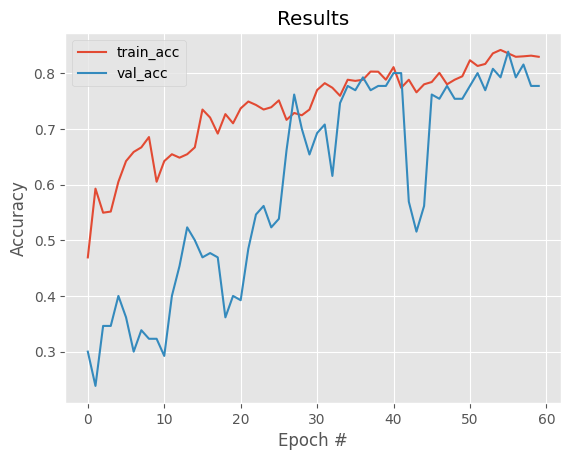

In [ ]:
N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Results")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("/content/drive/MyDrive/final_train_new/Accuracy.png")

print("End")

End


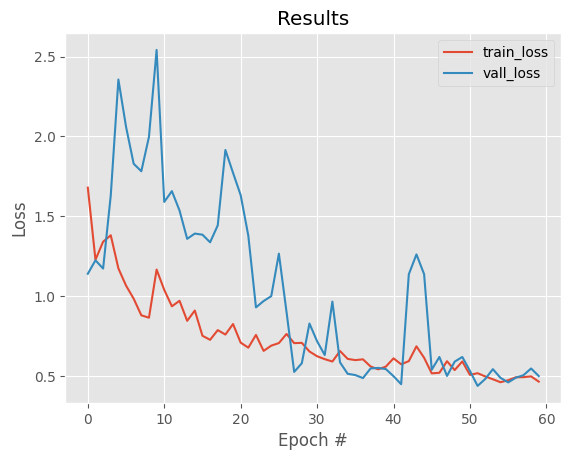

In [ ]:
N = np.arange(0, NUM_EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="vall_loss")
plt.title("Results")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("/content/drive/MyDrive/final_train_new/Loss.png")

print("End")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from keras.models import load_model
from imutils import paths
from google.colab.patches import cv2_imshow
import numpy as np
import cv2


In [ ]:
model = load_model("/content/drive/MyDrive/final_train_new/Best_Sign.h5")

In [ ]:
ImagePaths = list(paths.list_images("/content/rzhavchina/Add images/test"))

In [ ]:
data = []
for imagepath in ImagePaths:
  image = cv2.imread(imagepath)
  image = cv2.resize(image, (256, 256))
  data.append(image)
data = np.array(data, dtype="float") / 255.0
pred = model.predict(data)

1/1 [==============================] - 1s 1s/step


Поверхностная коррозия
0.0031450728 0.677342 0.31951293


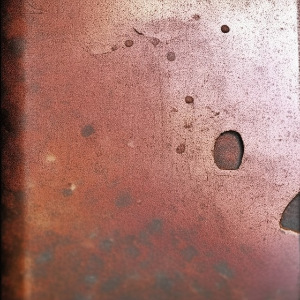

Поверхностная коррозия
0.015203514 0.97429657 0.010499842


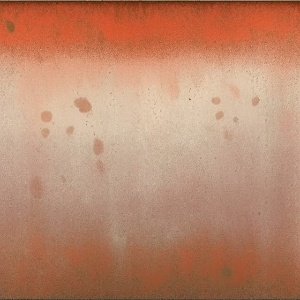

Глубокая коррозия
0.026579736 0.3641636 0.6092567


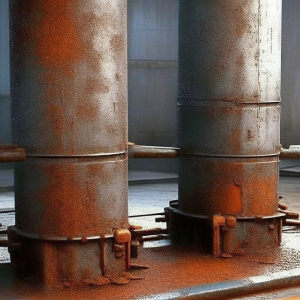

Без ржавчины
0.73427737 0.21513087 0.050591707


Поверхностная коррозия
0.0051943804 0.87662995 0.11817565


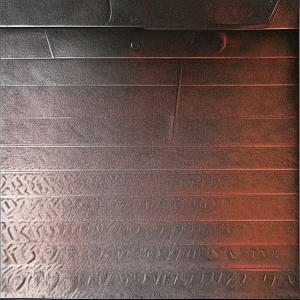

Поверхностная коррозия
0.36133623 0.5025837 0.13608001


Без ржавчины
0.9991842 0.00052485603 0.00029102483


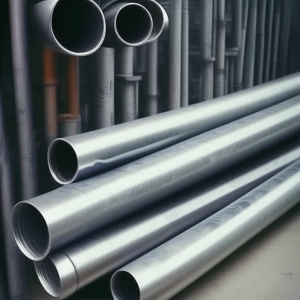

Поверхностная коррозия
0.037395623 0.73333323 0.22927113


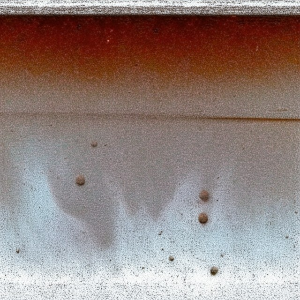

Глубокая коррозия
0.0019862049 0.12177011 0.8762436


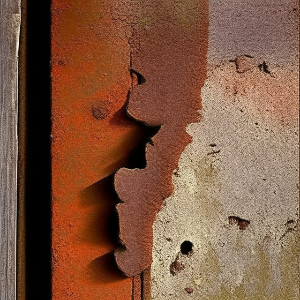

Глубокая коррозия
0.09883451 0.18562655 0.71553886


Глубокая коррозия
0.003134214 0.122001804 0.874864


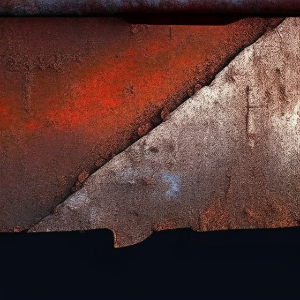

Поверхностная коррозия
0.0016794145 0.9675781 0.030742442


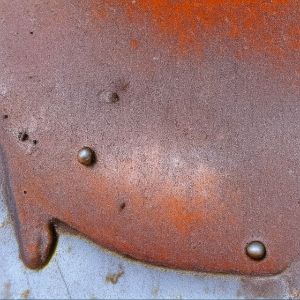

Глубокая коррозия
0.0024008946 0.2234613 0.7741378


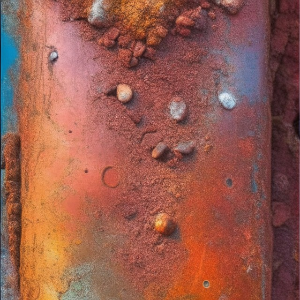

Без ржавчины
0.99435276 0.0023222477 0.0033250262


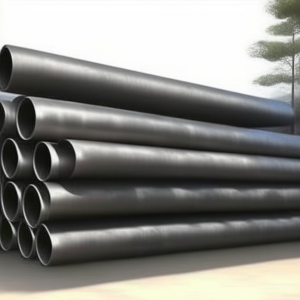

Поверхностная коррозия
0.010390043 0.9234418 0.066168025


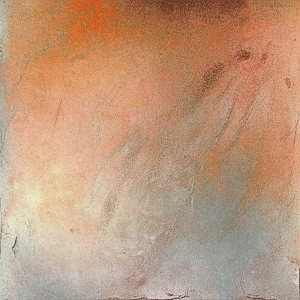

Глубокая коррозия
0.0024632877 0.11110521 0.88643146


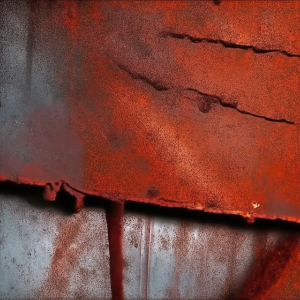

Глубокая коррозия
0.003139001 0.13340536 0.86345553


Поверхностная коррозия
0.039303605 0.60257083 0.3581255


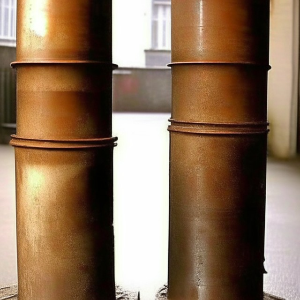

Без ржавчины
0.99609965 0.0007215697 0.0031786682


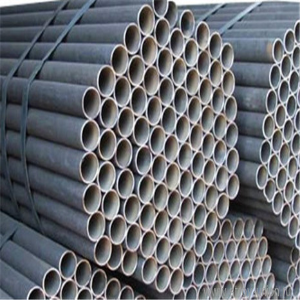

Глубокая коррозия
0.31613883 0.20882376 0.47503743


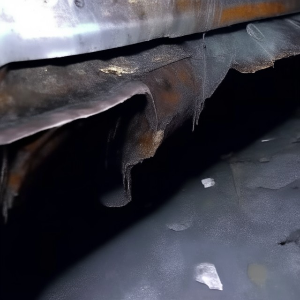

Глубокая коррозия
0.008987056 0.4228642 0.5681487


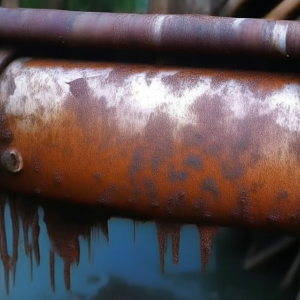

Без ржавчины
0.7547692 0.2057747 0.039456043


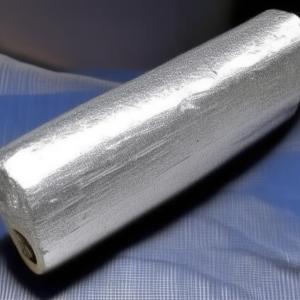

Глубокая коррозия
0.19040927 0.2766558 0.5329349


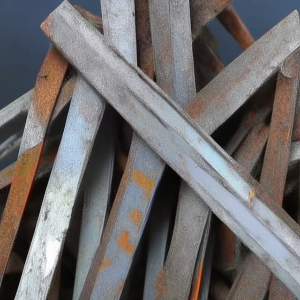

Без ржавчины
0.99817723 0.0014141058 0.00040866015


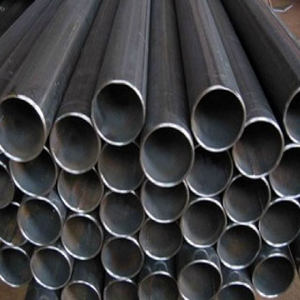

Без ржавчины
0.88558644 0.083190374 0.03122322


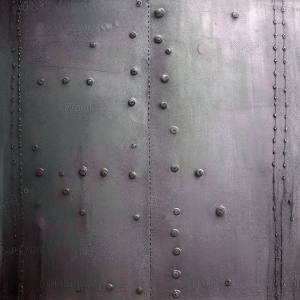

Глубокая коррозия
0.0086113755 0.39301845 0.5983702


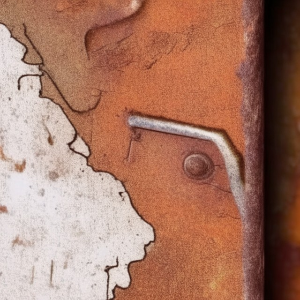

Глубокая коррозия
0.013760864 0.04385579 0.9423833


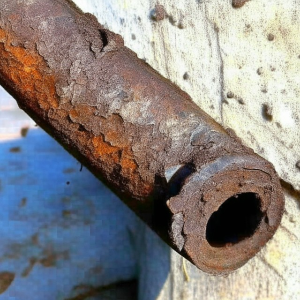

Без ржавчины
0.9999857 1.0509209e-05 3.7622806e-06


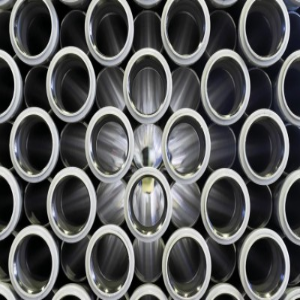

Без ржавчины
0.8062801 0.104840435 0.08887946


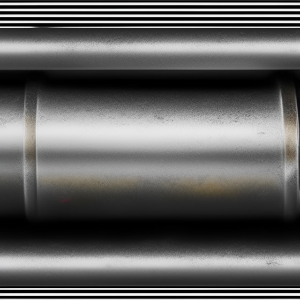

Без ржавчины
0.99992085 7.5592514e-05 3.575479e-06


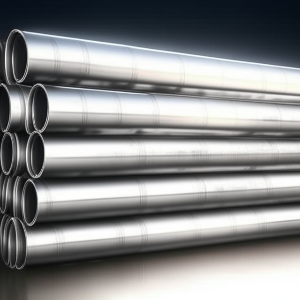

In [ ]:
for i in range(0, len(pred), 1):
    if ((pred[i][0] > pred[i][1]) and (pred[i][0] > pred[i][2])):
        print('Без ржавчины')
    elif ((pred[i][1] > pred[i][0]) and (pred[i][1] > pred[i][2])):
        print("Поверхностная коррозия")
    elif ((pred[i][2] > pred[i][0]) and (pred[i][2] > pred[i][1])):
        print("Глубокая коррозия")
    print(pred[i][0], pred[i][1], pred[i][2])
    image = cv2.imread(ImagePaths[i])
    cv2_imshow(cv2.resize(image, (300, 300)))
